# HF 1 (15 pont)

- Minden feladatot a feladatszámnak megfelelő számú megoldásnotebookban oldj meg. Például első feladatot az 01_feladat.ipynb notebookban.
- A megoldás tartalmazza a megoldandó feladat szövegét a megoldásnotebook első markdown cellájában!
- **Kommentekkel**, illetve **markdown cellákkal** magyarázd, hogy éppen mit csinál az adott kódrészlet!
- Magyarázat nélkül a beküldött feladatok csak fél feladatnak számítanak!
- Az elkészített ábrák minden esetben rendelkezzenek ábrafeliratokkal (cím, tengelyfeliratok és  −  amennyiben indokolt  −  jelmagyarázat)! Amennyiben a beadott ábrákon nincsenek feliratok, az adott feladat automatikusan csak fél feladatnak számít!
- A beadott notebookok Kernel -> Restart&Run All hatására a beadott formát reprodukálják! 
- A Feladatok megadott pontszámán túl a beadott feladatok külalakjáért összesen 3 pont-ot lehet szerezni!
---


## Feladat 5 (2 pont)

Írj egy-egy függvényt, amik véletlenszerűen generálnak 5-ös és 6-os lottó számokat!

- A függvény opcionálisan fogadjon el egy 'seed' argumentumot, ami a véletlen szám generátort inicializálja. Ha ugyanazt a seed-et adjuk meg a függvénynek, akkor mindig ugyanazokat a lottószámokat adja vissza!
- Példaként futtasd és ellenőrizd le a megoldásodat! Ellenőrizd a seed argumentum működését is!
- Legyenek a húzott számok eleve növekvő sorrendben!
- Futtasd le mindkét függvényt 100 000-szer, minden esetnél kiszámolva a legkisebb két húzott szám különbségét!
- A különbségek eloszlásáról készíts hisztogramot!

In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import time

In [2]:
def otos(seed = 0):
    """
    Choose five from 1 to 90 without repeating a choosen number.
    """
    f_list = 0
    if seed == 0:
        f_list = sorted(rn.sample(range(1, 90), 5))
        f_list.sort()
    else:
        static_seed = seed
        rn.seed(static_seed)
        f_list = sorted(rn.sample(range(1, 90), 5))
        f_list.sort()
    return f_list

In [3]:
otos(),otos()

([13, 26, 27, 53, 67], [5, 14, 34, 56, 71])

In [4]:
for i in range(5):
    print(otos(78))

[13, 25, 33, 39, 86]
[13, 25, 33, 39, 86]
[13, 25, 33, 39, 86]
[13, 25, 33, 39, 86]
[13, 25, 33, 39, 86]


In [5]:
def hatos(seed = 0):
    """
    Choose 6 from 1 to 45 without repeating a choosen number.
    """
    f_list = 0
    if seed == 0:
        f_list = sorted(rn.sample(range(1, 45), 6))
    else:
        static_seed = seed
        rn.seed(static_seed)
        f_list = sorted(rn.sample(range(1, 45), 6))
    return f_list

In [6]:
hatos(),hatos()

([3, 10, 13, 26, 28, 42], [1, 12, 16, 25, 31, 35])

In [7]:
for i in range(5):
    print(hatos(78))

[3, 7, 13, 17, 20, 28]
[3, 7, 13, 17, 20, 28]
[3, 7, 13, 17, 20, 28]
[3, 7, 13, 17, 20, 28]
[3, 7, 13, 17, 20, 28]


In [20]:
start = time.time()
otos_div = []
hatos_div = []
for i in range(100000):
    a = otos()
    b = hatos()
    otos_div.append(a[1] - a[0])
    hatos_div.append(b[1] - b[0])
end = time.time()
end - start

1.8877685070037842

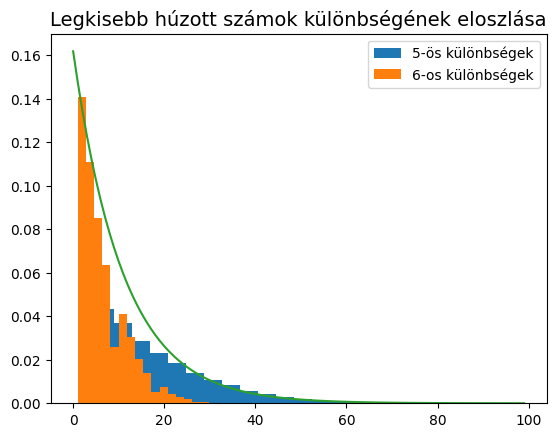

In [9]:
plt.hist(otos_div,bins = 20,density = True, label = "5-ös különbségek")
plt.hist(hatos_div,bins = 20,density = True,label = "6-os különbségek")
plt.plot(0.44*np.exp(-np.linspace(1,10,100)));
plt.title("Legkisebb húzott számok különbségének eloszlása",size = 14)
plt.legend();

## ChatGPT

In [10]:
import random

def generate_lotto5(seed=None):
    if seed is not None:
        random.seed(seed)
    numbers = sorted(random.sample(range(1, 91), 5))
    return numbers

def generate_lotto6(seed=None):
    if seed is not None:
        random.seed(seed)
    numbers = sorted(random.sample(range(1, 46), 6))
    return numbers

In [11]:
import matplotlib.pyplot as plt

# Példa futtatások seed-del és anélkül
print("5-ös lottó, seed nélkül:", generate_lotto5())
print("5-ös lottó, seed 42:", generate_lotto5(seed=42))
print("5-ös lottó, seed 42 újra:", generate_lotto5(seed=42))

print("6-os lottó, seed nélkül:", generate_lotto6())
print("6-os lottó, seed 42:", generate_lotto6(seed=42))
print("6-os lottó, seed 42 újra:", generate_lotto6(seed=42))

5-ös lottó, seed nélkül: [3, 15, 20, 58, 70]
5-ös lottó, seed 42: [4, 15, 32, 36, 82]
5-ös lottó, seed 42 újra: [4, 15, 32, 36, 82]
6-os lottó, seed nélkül: [6, 7, 9, 15, 35, 38]
6-os lottó, seed 42: [2, 8, 15, 16, 18, 41]
6-os lottó, seed 42 újra: [2, 8, 15, 16, 18, 41]


In [17]:
start = time.time()
# 100 000-szer lefuttatjuk a függvényeket és kiszámoljuk a legkisebb két szám különbségét
diffs_lotto5 = []
diffs_lotto6 = []

for _ in range(100000):
    lotto5 = generate_lotto5()
    diffs_lotto5.append(min([b - a for a, b in zip(lotto5[:-1], lotto5[1:])]))

    lotto6 = generate_lotto6()
    diffs_lotto6.append(min([b - a for a, b in zip(lotto6[:-1], lotto6[1:])]))
end = time.time()
end - start

2.35768461227417

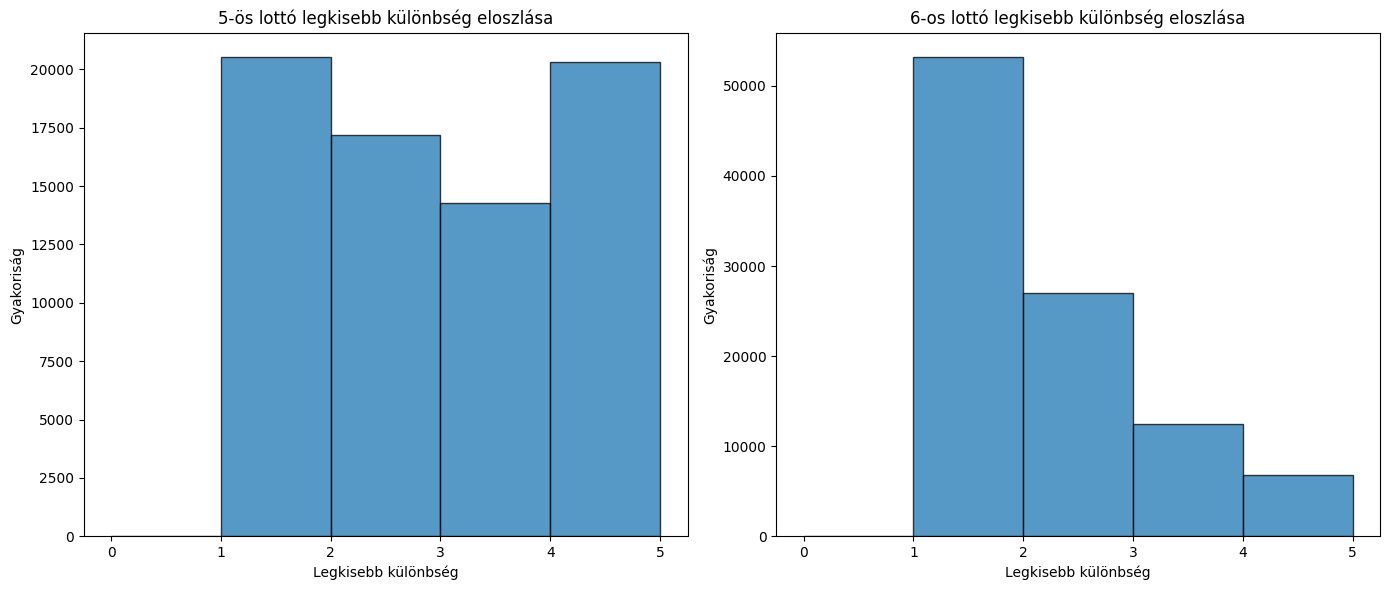

In [13]:
# Hisztogramok készítése
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(diffs_lotto5, bins=range(6), edgecolor='black', alpha=0.75)
plt.title("5-ös lottó legkisebb különbség eloszlása")
plt.xlabel("Legkisebb különbség")
plt.ylabel("Gyakoriság")

plt.subplot(1, 2, 2)
plt.hist(diffs_lotto6, bins=range(6), edgecolor='black', alpha=0.75)
plt.title("6-os lottó legkisebb különbség eloszlása")
plt.xlabel("Legkisebb különbség")
plt.ylabel("Gyakoriság")

plt.tight_layout()
plt.show()